# Choix du sujet 

Au début du cours nous devions choisir un projet. Parmi les propositions, deux d'entre elles avaient retenues notre attention : 

1°) Construisez un résumé des conclusions de ces 5 dernières années concernant le changement climatique ainsi que des projections de scenarii possibles.

2°) Dressez un bilan des principales migrations dans le monde durant ces 5 dernières années.

Ces deux sujets nous intéressait particulièrement et nous avons voulu y ajouter également une dimension économique.

Nous avons donc débuter nos recherches par une phase exploratoire sur ces trois sujets en se repartissant un sujet par personne : Marlon sur le sujet de l'Immigration, Cristian sur l'Économie et moi sur le Changement Climatique. 

# 1°) Phase exploratoire

## DATASET : Concentration de CO2 dans l'atmosphère à l'échelle mondiale

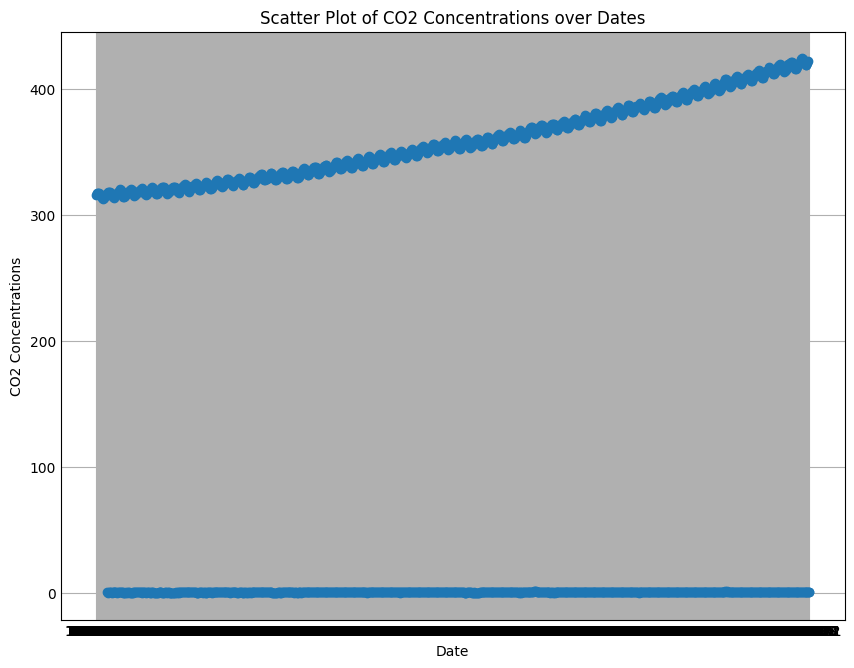

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import plotly.express as px
from ipywidgets import interact, Dropdown
import geopandas as gpd
import mapclassify
import folium
import ipywidgets as widgets
from IPython.display import display

# Méthode pour vérifier les valeurs uniques présentes dans un dataframe
def checking_unique_value(df):
    unique_values = [df[col].nunique() for col in df]
    for col, values in zip(df.columns, unique_values):
        print(f"Unique values in column '{col}': {values}")

## Téléchargement du dataset correspondant au taux de CO2 dans l'atmosphère à l'échelle planétaire uniquement
atmospheric_CO2_Concentrations_df = pd.read_csv('./DataSets/Atmospheric_CO2_Concentrations.csv')
atmospheric_CO2_Concentrations_df = pd.DataFrame(atmospheric_CO2_Concentrations_df)
atmospheric_CO2_Concentrations_df.head

## Exploration
#atmospheric_CO2_Concentrations_df.info()
#atmospheric_CO2_Concentrations_df.describe().round(2)
#checking_unique_value(atmospheric_CO2_Concentrations_df)
#atmospheric_CO2_Concentrations_df['Indicator'].unique()
#atmospheric_CO2_Concentrations_df.columns
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
df = atmospheric_CO2_Concentrations_df.drop(columns=columns_to_drop, axis='columns')
df

## Identification des valeurs manquantes
#blank_counts = df.isnull().sum()
#blank_counts.sum()

## Identification des valeurs aberrantes
#sns.boxplot(df, x='Date', y='Value')

## Identification des valeurs aberrantes
plt.style.use('_mpl-gallery')

x = df['Date']
y = df['Value']

# Plot
plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('CO2 Concentrations')
plt.title('Scatter Plot of CO2 Concentrations over Dates')
plt.grid(True)  # Add gridlines if needed
plt.show()

##### On observe que régulièrement deux valeurs sont prélevées à la même date. Parmis ces deux valeurs, une correspond à la concentration par mois de CO2 dans l'air en part par million de particules et l'autre correspond à la concentration par mois de C02 dans l'air en pourcentage.

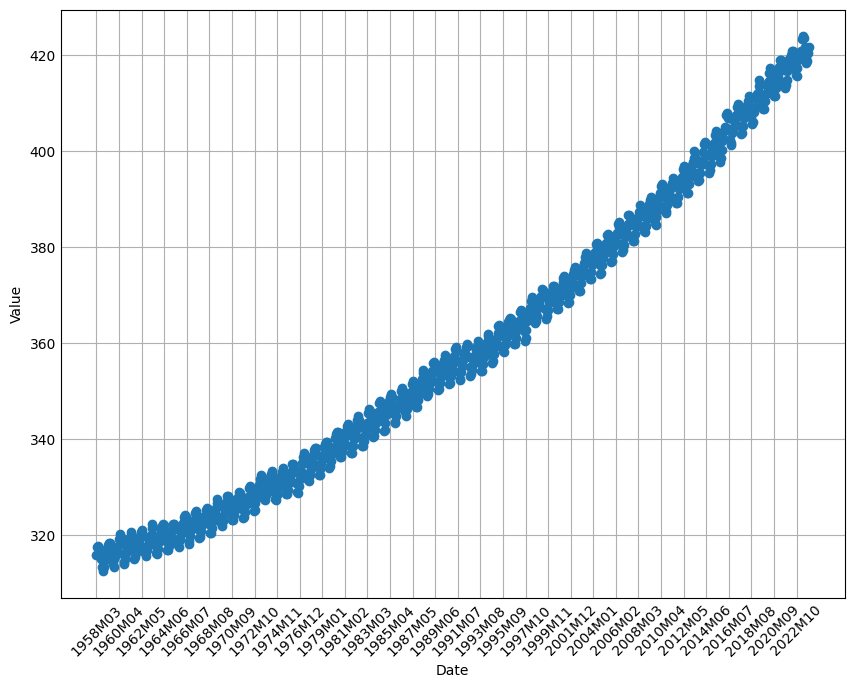

In [2]:
values_to_drop = np.where(df['Value'] < 2)
#values_to_drop[0] correspond aux valeurs à supprimer de la colonne Value.
CO2_concentration_part_per_million_df = df.drop(values_to_drop[0])
CO2_concentration_part_per_million_df

# Scatter plot
fig, ax_CO2_concentration_part_per_million = plt.subplots(figsize=(8, 6))
ax_CO2_concentration_part_per_million.scatter(CO2_concentration_part_per_million_df['Date'], CO2_concentration_part_per_million_df['Value'])
ax_CO2_concentration_part_per_million.set_xlabel('Date')
ax_CO2_concentration_part_per_million.set_ylabel('Value')
plt.xticks(CO2_concentration_part_per_million_df['Date'][::25], rotation=45)
plt.show()

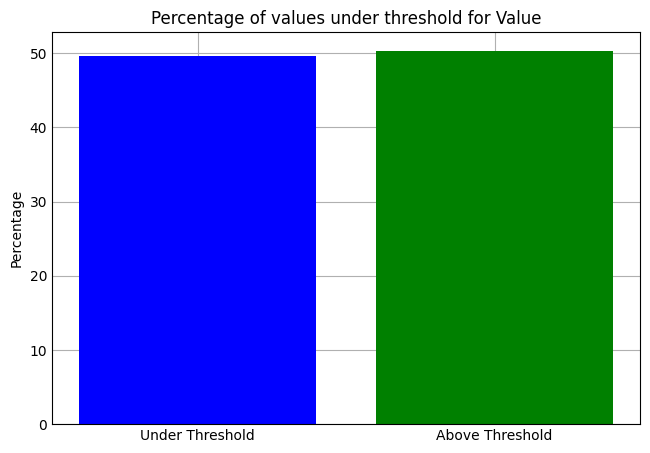

In [3]:
# Mise en lace d'un seuil
threshold = 2
count_under_threshold = (df['Value'] < threshold).sum()
total_values = len(df)
percentage_under_threshold = (count_under_threshold / total_values) * 100


 #Plotting the percentage in a bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.bar(['Under Threshold', 'Above Threshold'], [percentage_under_threshold, 100 - percentage_under_threshold], color=['blue', 'green'])
plt.ylabel('Percentage')
plt.title(f'Percentage of values under threshold for {df["Value"].name}')  # Corrected title formatting
plt.show()

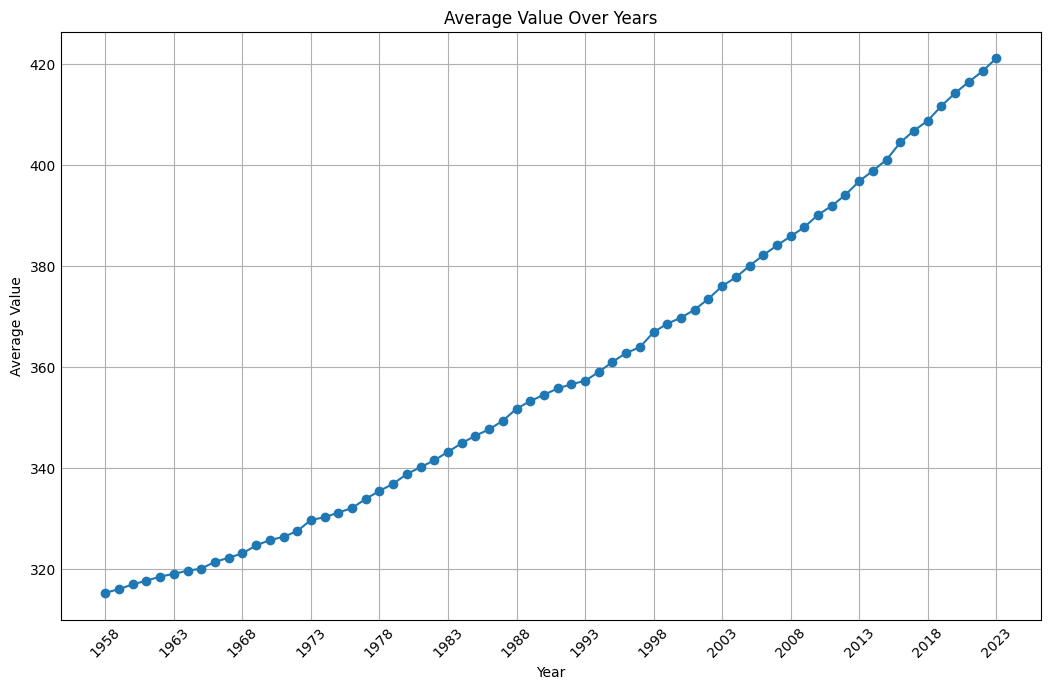

In [4]:
CO2_concentration_part_per_million_df['Year'] = CO2_concentration_part_per_million_df['Date'].str[:4] #Création de la colonne 'Year'
grouped_CO2_concentration_part_per_million_data = CO2_concentration_part_per_million_df.groupby('Year')['Value'].mean() #Regroupement des valeurs moyennes de concentrations de CO2 par année. 

plt.figure(figsize=(10, 6))
plt.plot(grouped_CO2_concentration_part_per_million_data.index, grouped_CO2_concentration_part_per_million_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_CO2_concentration_part_per_million_data.index[::5], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

##### La concentration de CO2 est croissante depuis les années 1958 et semble suivre une fonction linéaire. Ceci correspond à une tendance globale et mondiale mais qu'en est-t-il des tendances par pays ?

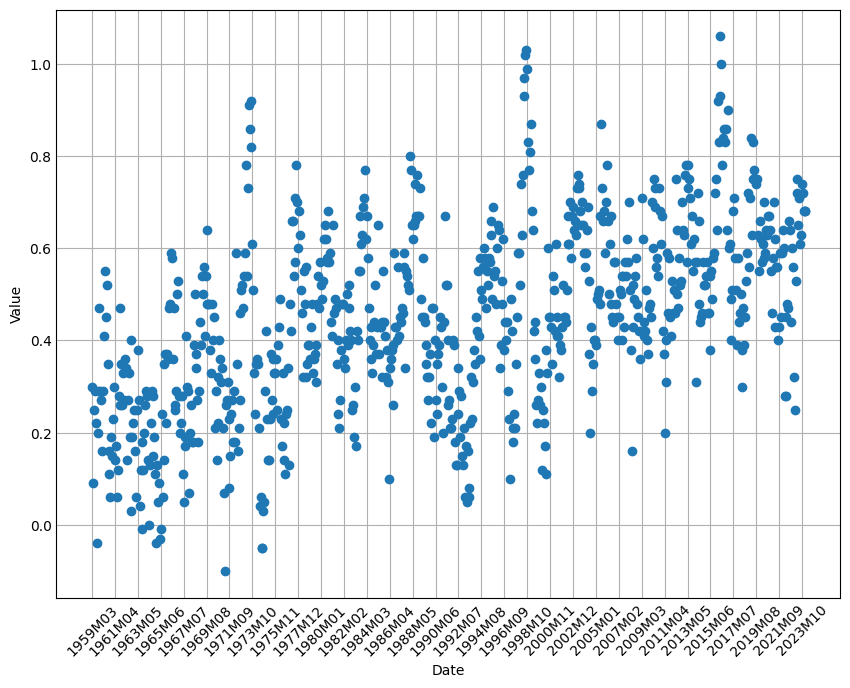

In [5]:
values_to_drop = np.where(df['Value'] > 2)
#values_to_drop[0] correspond aux valeurs à supprimer de la colonne Value.
CO2_concentration_percent_df = df.drop(values_to_drop[0])

# Scatter plot
fig, ax_CO2_concentration_percent = plt.subplots(figsize=(8, 6))
ax_CO2_concentration_percent.scatter(CO2_concentration_percent_df['Date'], CO2_concentration_percent_df['Value'])
ax_CO2_concentration_percent.set_xlabel('Date')
ax_CO2_concentration_percent.set_ylabel('Value')
plt.xticks(CO2_concentration_percent_df['Date'][::25], rotation=45)
plt.show()

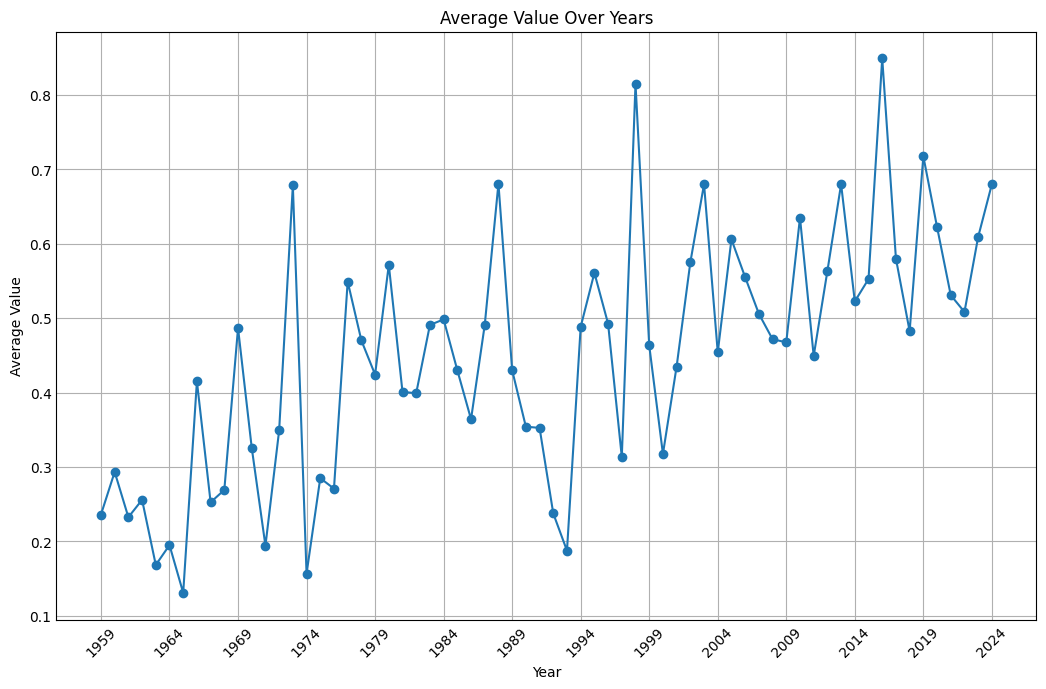

In [6]:
CO2_concentration_percent_df['Year'] = CO2_concentration_percent_df['Date'].str[:4] #Création de la colonne 'Year'
grouped_CO2_concentration_percent_data = CO2_concentration_percent_df.groupby('Year')['Value'].mean() #Regroupement des valeurs moyennes de concentrations de CO2 par année. 
#grouped_CO2_concentration_percent_data

plt.figure(figsize=(10, 6))
plt.plot(grouped_CO2_concentration_percent_data.index, grouped_CO2_concentration_percent_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_CO2_concentration_percent_data.index[::5], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

In [7]:
CO2_by_country_df = pd.concat([atmospheric_CO2_Concentrations_df['Country'], atmospheric_CO2_Concentrations_df['Date'], atmospheric_CO2_Concentrations_df['Value']], axis=1)
CO2_by_country_df.nunique()

Country      1
Date       791
Value      868
dtype: int64

## DATASET : Changement de température à la surface de la terre

In [8]:
annual_surface_temperature_change_df = pd.read_csv('./DataSets/Annual_Surface_Temperature_Change.csv')
annual_surface_temperature_change_df.head()

ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of the Unite...     ECCS   
3  Food and Agriculture Organization of the Unite...     ECCS   
4  Food and Agriculture Organization of the Unite...     ECCS   

                     CTS_Name  \
0  Surface Temperature Change   
1  Surface Temperature Change   
2  Surface Temperature Change   
3  Surface Temperature Change   
4  Surface Temperature Change   

                                 CTS_Full_Descriptor  ...  F2013  F2014  \
0  Environment, Climate Change, Climate Indicator...  ...  1.281  0.456   
1  Environment, Climate Change, Climate Indicator...  ...  1.333  1.198   
2  Environment, Climate Change, Climate Indicator...  ...  1.192  1.690   
3  Environment, Climate Change, Climate Indicator...  ...  1.257  1.170   
4  Environment, Climate Change, Climate Indicator...  ...  0.831  1.946   

   F2015  F2016  F2017  F2018  F2019  F2020  F2021  F2022  
0  1.093  1.555  1.540  1.544  0.910  0.498  1.327  2.012  
1  1.569  1.464  1.121  2.028  1.675  1.498  1.536  1.518  
2  1.121  1.757  1.512  1.210  1.115  1.926  2.330  1.688  
3  1.009  1.539  1.435  1.189  1.539  1.430  1.268  1.256  
4  1.690  1.990  1.925  1.919  1.964  2.562  1.533  3.243  

[5 rows x 72 columns]

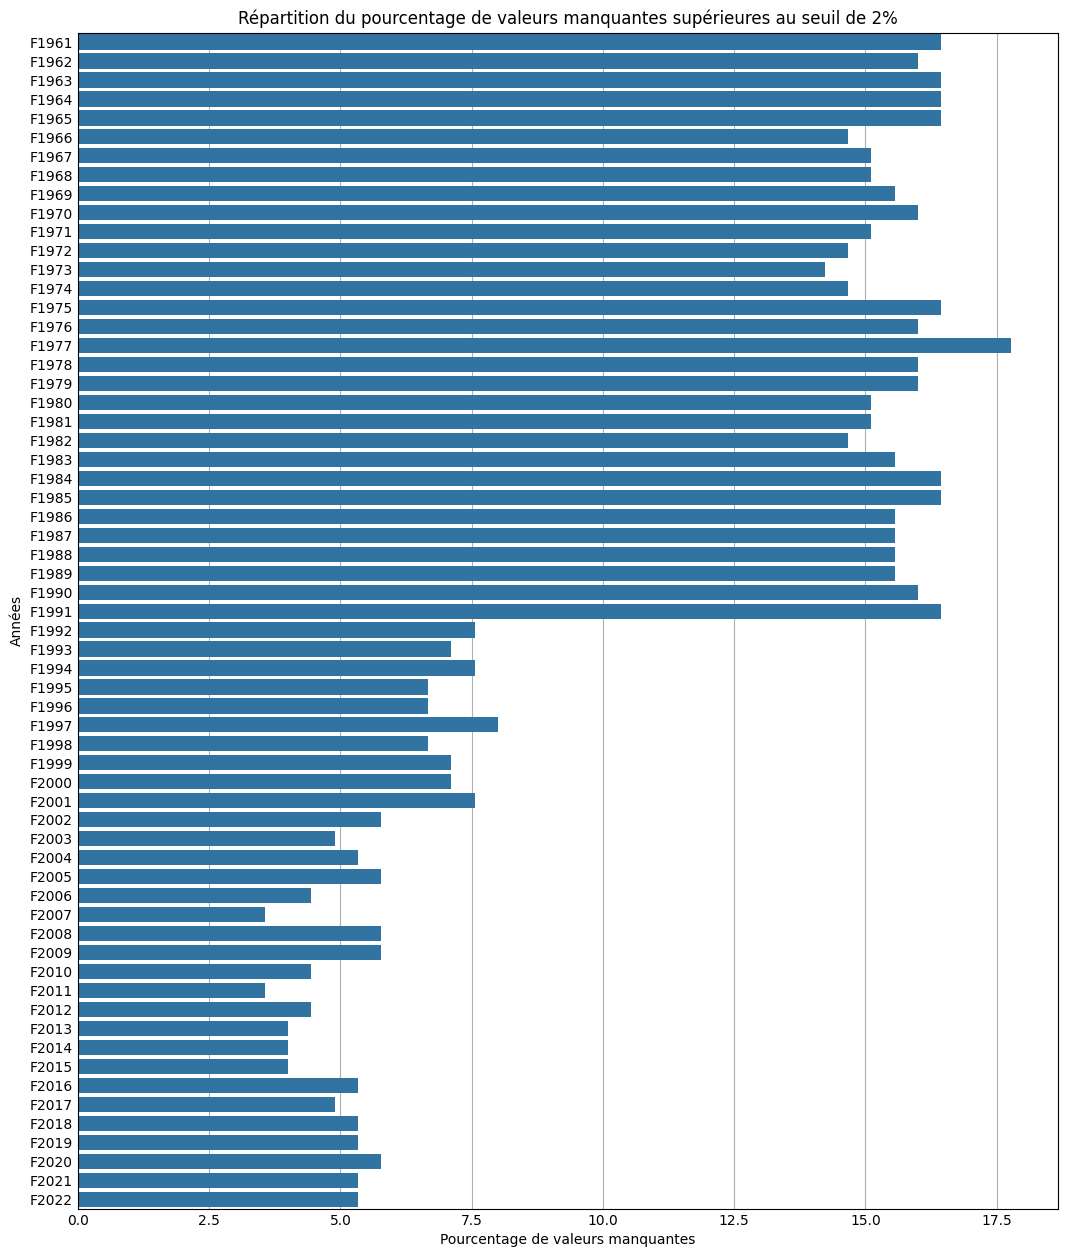

In [9]:
#annual_surface_temperature_change_df.columns
#annual_surface_temperature_change_df.info()
#annual_surface_temperature_change_df.describe().round(2)

## At a glance, we can see that we have several empty cells (null or blank).

## Identification des valeurs uniques
#checking_unique_value(annual_surface_temperature_change_df)
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
df = annual_surface_temperature_change_df.drop(columns=columns_to_drop, axis='columns')

## We can display the dataframe of the years columns.
#df

numerical_df = annual_surface_temperature_change_df.select_dtypes(include = ['int64','float64']).columns.values

## Correspond to the number of blank or null values from each columns
null_counts = annual_surface_temperature_change_df.isnull().sum()

## We can retrieve the sum of null value from all the df
#null_counts.sum()
#sorted(null_counts)

## Pourcentage de valeurs manquantes
percent_missing = annual_surface_temperature_change_df.isnull().sum() * 100 / len(annual_surface_temperature_change_df)
sorted(percent_missing.round(2))
#percent_missing = percent_missing.sort_values(ascending=False,inplace=True)

threshold_view = 2

filtered = percent_missing[percent_missing.values > threshold_view]
plt.figure(figsize=(10, 12)) 
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
ax.set_title(f"Répartition du pourcentage de valeurs manquantes "
             f"supérieures au seuil de {threshold_view}%");
ax.set_xlabel("Pourcentage de valeurs manquantes")
ax.set_ylabel("Années")

plt.show()

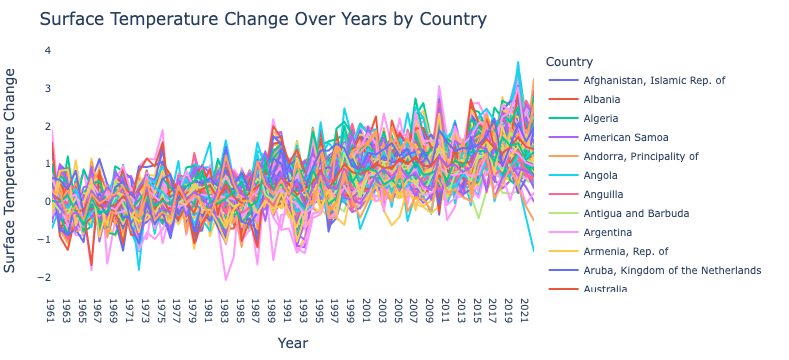

In [10]:
knn = KNNImputer(n_neighbors=5)
imputed_values = knn.fit_transform(df)

imputed_df = pd.DataFrame(imputed_values, columns=df.columns, index=df.index)
#imputed_df
#imputed_df.isna().sum().sum()
country = annual_surface_temperature_change_df['Country']
#imputed_df
country_year_df = pd.concat([country, imputed_df], axis=1)
#country_year_df = country_year_df.set_index('Country')[year_features]
country_year_df.columns = country_year_df.columns.where(~country_year_df.columns.str.startswith('F'), country_year_df.columns.str[1:])
#country_year_df

df_melted = country_year_df.melt(id_vars='Country', var_name='Year', value_name='Value')

# Create an interactive line plot using Plotly Express
fig = px.line(df_melted, x='Year', y='Value', color='Country',
              title='Surface Temperature Change Over Years by Country',
              labels={'Value': 'Value', 'Year': 'Year', 'Country': 'Country'})

# Update layout
fig.update_layout(xaxis_title='Year', yaxis_title='Surface Temperature Change')

# Scale down properties
fig.update_layout(font=dict(size=12),  # Adjust font size
                  legend=dict(font=dict(size=10)),  # Adjust legend font size
                  margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
                  hoverlabel=dict(font_size=10),  # Adjust hover label font size
                  hovermode='x',  # Display hover information only along x-axis
                  showlegend=True,  # Show legend
                  plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color
                  xaxis=dict(tickfont=dict(size=10)),  # Adjust x-axis tick font size
                  yaxis=dict(tickfont=dict(size=10)),  # Adjust y-axis tick font size
                  )

# Show plot
fig.show()

In [11]:
country_year_df.set_index('Country', inplace=True)

##### Create a plot to see the evolution of the Annual Surface Temperature Change (ASTC) over the globe.

In [12]:
## Plot function to plot temperature change for the selected country
def plot_temperature_change(country):
    plt.clf()  # Clear previous plot
    plt.plot(country_year_df_transposed[country])
    plt.title(f'Temperature Change in {country}')
    plt.xlabel('Years')
    plt.ylabel('Temperature Change (°C)')
    plt.xticks(country_year_df_transposed.index[::3], rotation=90)
    plt.show()

country_year_df_transposed = country_year_df.T

## Dropdown menu
countries = list(country_year_df_transposed.columns)
country_dropdown = Dropdown(options=countries, description='Country:')

## Use interact to link the dropdown with the plotting function
interact(plot_temperature_change, country=country_dropdown)

## Calculate mean temperature change for each country
mean_temperatures = country_year_df_transposed.mean(axis=1)

interactive(children=(Dropdown(description='Country:', options=('Afghanistan, Islamic Rep. of', 'Albania', 'Al…

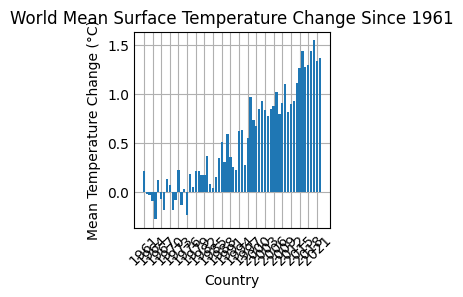

In [13]:
# Plot bar chart
plt.bar(mean_temperatures.index, mean_temperatures)
plt.title('World Mean Surface Temperature Change Since 1961')
plt.xlabel('Country')
plt.ylabel('Mean Temperature Change (°C)')
plt.xticks(country_year_df_transposed.index[::3], rotation=45)
plt.show()

## DATASET : Niveau moyen de la mer

In [14]:
change_in_mean_sea_level_df = pd.read_csv('./DataSets/Change_in_Mean_Sea_Levels.csv')
change_in_mean_sea_level_df = pd.DataFrame(change_in_mean_sea_level_df)
change_in_mean_sea_level_df.head()

ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator         Unit  \
0  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
2  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
3  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
4  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   

                                              Source CTS_Code  \
0  National Oceanic and Atmospheric Administratio...     ECCL   
1  National Oceanic and Atmospheric Administratio...     ECCL   
2  National Oceanic and Atmospheric Administratio...     ECCL   
3  National Oceanic and Atmospheric Administratio...     ECCL   
4  National Oceanic and Atmospheric Administratio...     ECCL   

                   CTS_Name  \
0  Change in Mean Sea Level   
1  Change in Mean Sea Level   
2  Change in Mean Sea Level   
3  Change in Mean Sea Level   
4  Change in Mean Sea Level   

                                 CTS_Full_Descriptor         Measure  \
0  Environment, Climate Change, Climate Indicator...     Andaman Sea   
1  Environment, Climate Change, Climate Indicator...     Arabian Sea   
2  Environment, Climate Change, Climate Indicator...  Atlantic Ocean   
3  Environment, Climate Change, Climate Indicator...      Baltic Sea   
4  Environment, Climate Change, Climate Indicator...      Bay Bengal   

          Date   Value  
0  D12/17/1992  -10.34  
1  D12/17/1992  -18.46  
2  D12/17/1992  -15.41  
3  D12/17/1992  196.85  
4  D12/17/1992    3.27

In [15]:
#change_in_mean_sea_level_df.columns
#change_in_mean_sea_level_df.info()
#change_in_mean_sea_level_df.describe().round(2)
#checking_unique_value(change_in_mean_sea_level_df)
#change_in_mean_sea_level_df['Indicator'].unique()

##### Indicator column indicates the label of the satellite altimeters which recorded the datas

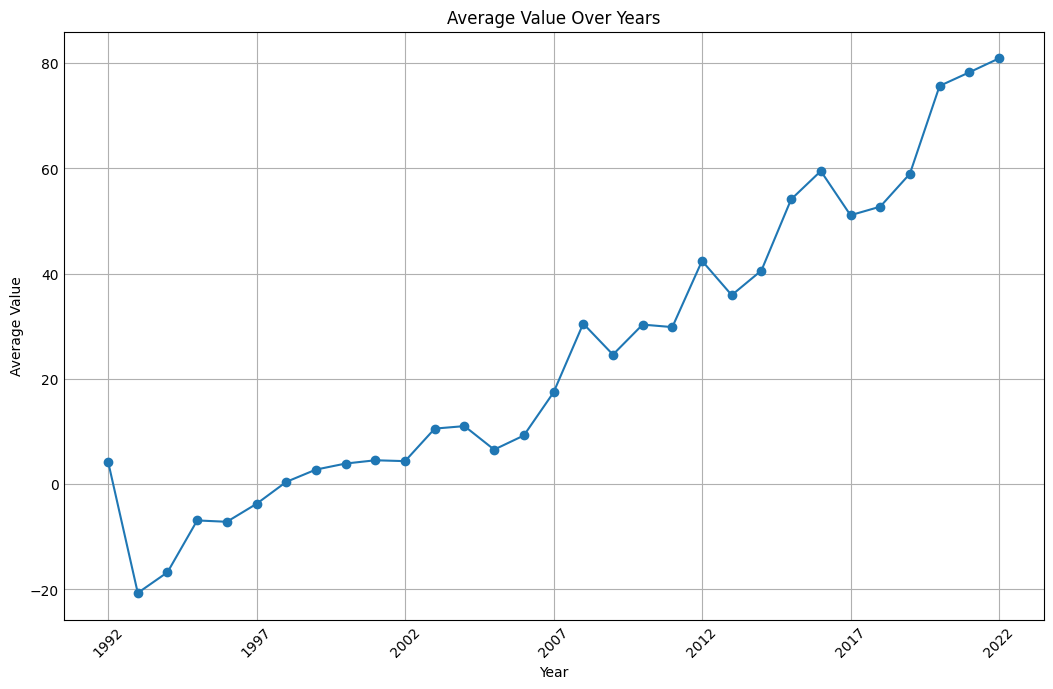

In [16]:
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
df = change_in_mean_sea_level_df.drop(columns=columns_to_drop, axis='columns')
#df.head()
# Assuming df is your DataFrame
df['Indicator'] = df['Indicator'].str.replace('Change in mean sea level: Sea level: ', '') 
#df.shape
#df.head()
#df.isnull().sum().sum()
df['Year'] = df['Date'].str[7:] #Création de la colonne 'Year'
grouped_year_data = df.groupby('Year')['Value'].mean() #Regroupement des valeurs en une moyenne du changement du niveau de la mer par année.

plt.figure(figsize=(10, 6))
plt.plot(grouped_year_data.index, grouped_year_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_year_data.index[::5], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

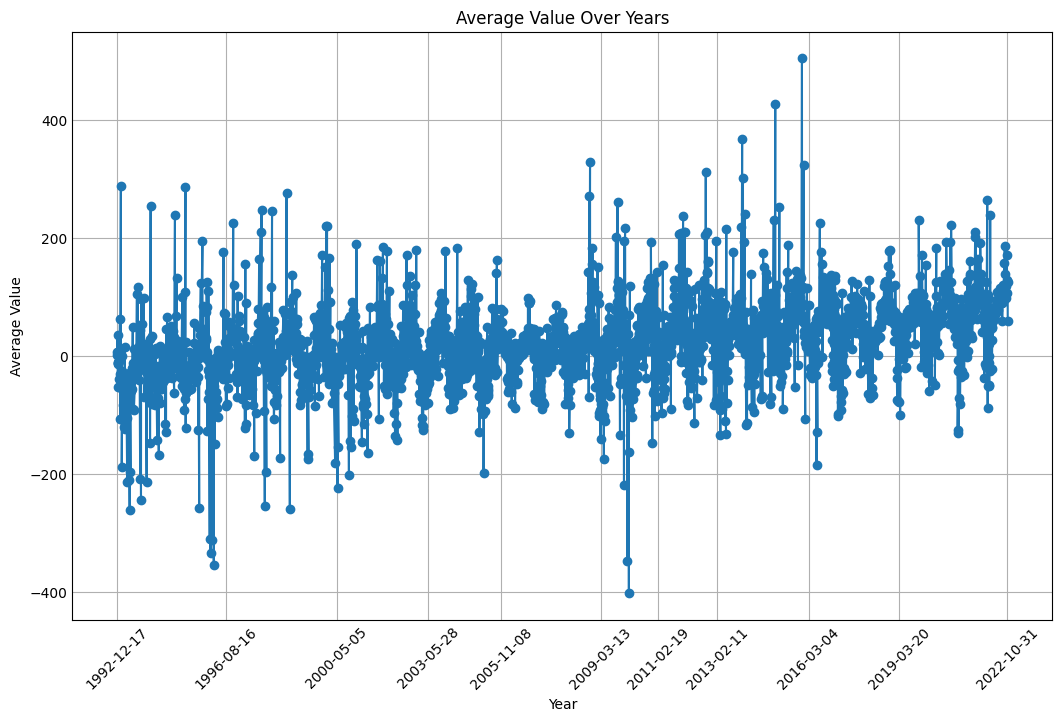

In [17]:
df['Day'] = df['Date'].str[1:] #Création de la colonne 'Day'
df['Day'] = pd.to_datetime(df['Day'], format='%m/%d/%Y')
grouped_day_data = df.groupby('Day')['Value'].mean() #Regroupement des valeurs en une moyenne du changement du niveau de la mer par année. 

df_sorted = grouped_day_data.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_day_data.index, grouped_day_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_day_data.index[::365], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

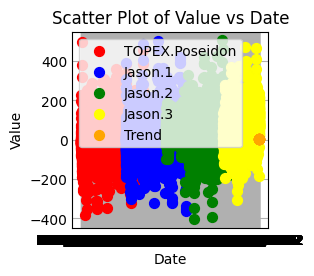

In [18]:
indicator_colors = {
    'TOPEX.Poseidon': 'red',
    'Jason.1' : 'blue',
    'Jason.2' : 'green',
    'Jason.3' : 'yellow',
    'Trend' : 'orange'
}

# Create a scatter plot
for indicator, color in indicator_colors.items():
    plt.scatter(df[df['Indicator'] == indicator]['Date'], 
                df[df['Indicator'] == indicator]['Value'], 
                label=indicator, 
                color=color,
                s=50)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Value vs Date')
plt.legend()

# Show plot
plt.show()

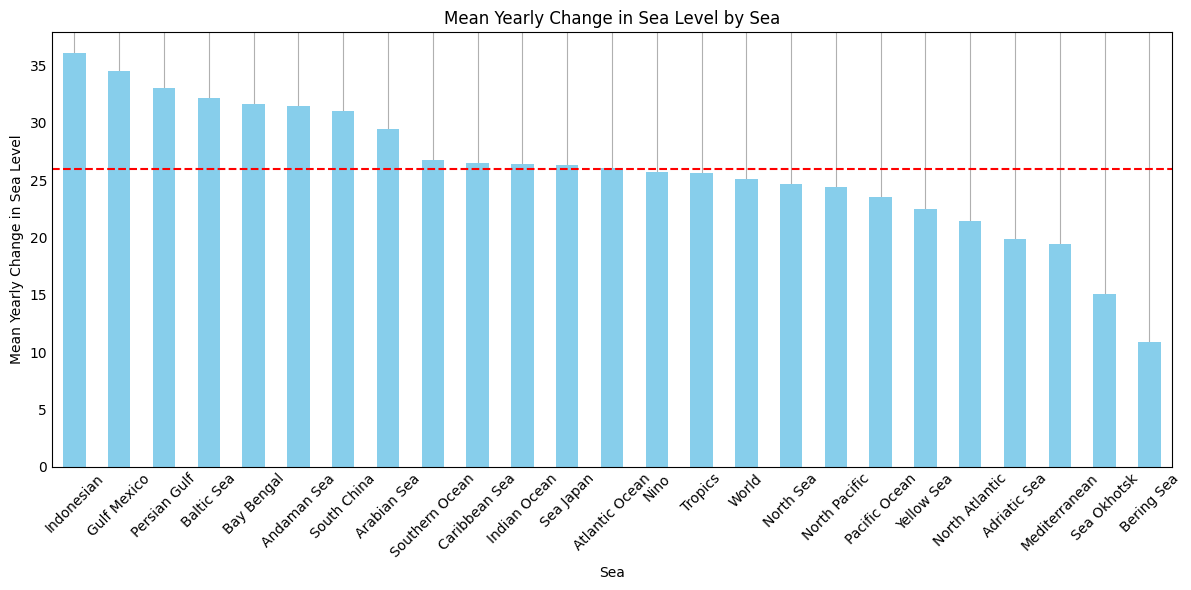

In [19]:
mean_sea_level_per_country = change_in_mean_sea_level_df.groupby('Measure')['Value'].mean().sort_values(ascending=False)

overall_mean_sea_level = df['Value'].mean()

# Plotting the histogram
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
mean_sea_level_per_country.plot(kind='bar', color='skyblue', label='Mean Sea Level Change by Sea')
plt.axhline(y=overall_mean_sea_level, color='red', linestyle='--', label='Overall Mean Sea Level Change')
plt.xlabel('Sea')
plt.ylabel('Mean Yearly Change in Sea Level')
plt.title('Mean Yearly Change in Sea Level by Sea')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## DATASET : Indicateurs liés aux Forêts

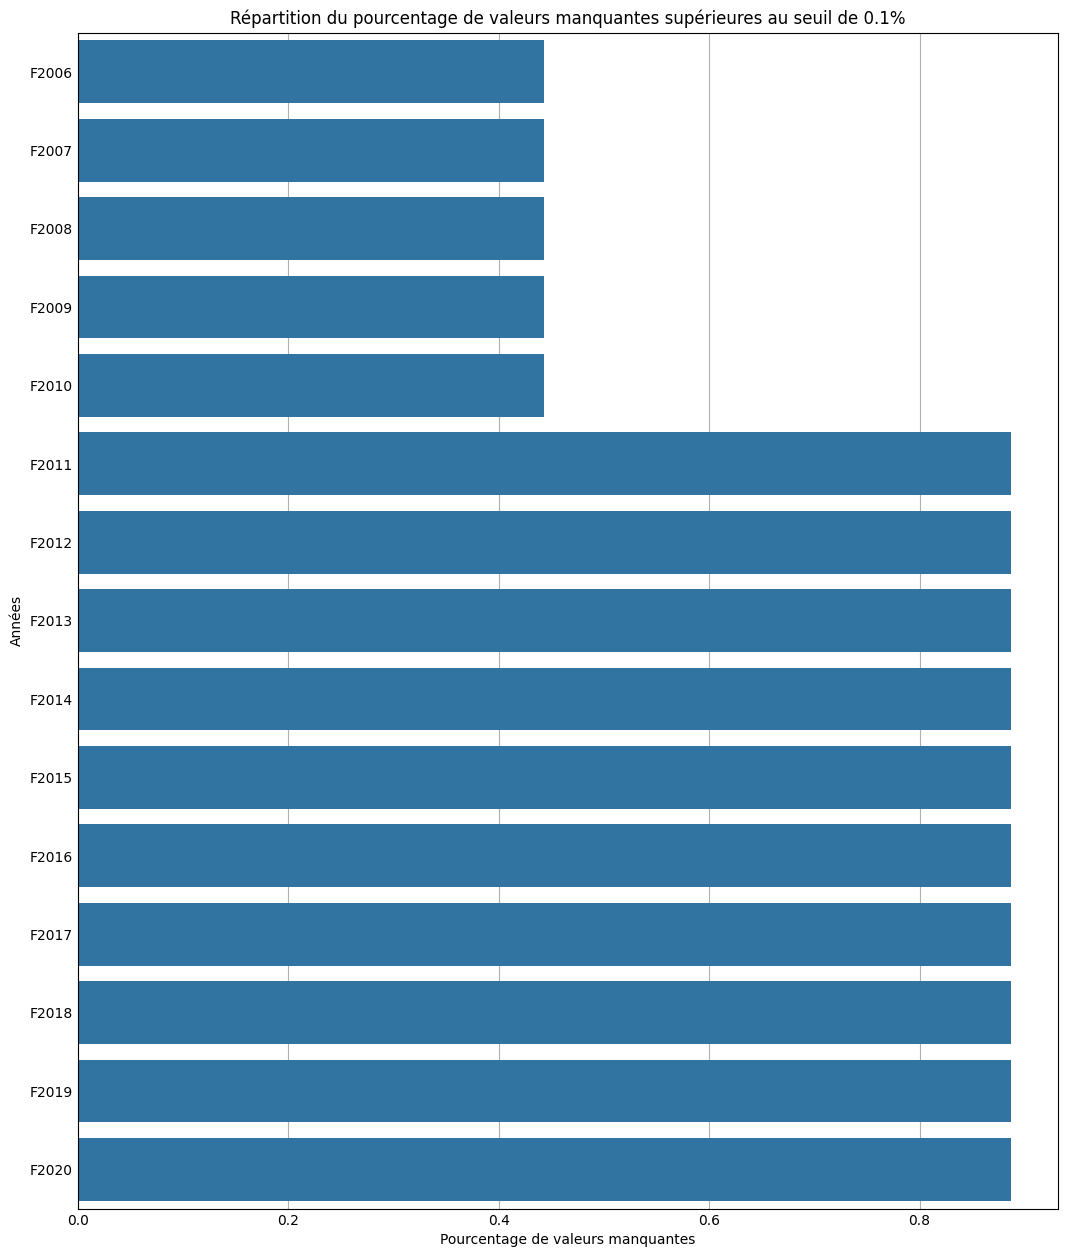

In [20]:
forest_and_carbon_df = pd.read_csv('./DataSets/Forest_and_Carbon.csv')
forest_and_carbon_df = pd.DataFrame(forest_and_carbon_df)
#forest_and_carbon_df.head()

#forest_and_carbon_df.columns
#forest_and_carbon_df.info()
#forest_and_carbon_df.describe().round(2)
#checking_unique_value(forest_and_carbon_df)

numeric_columns_df = forest_and_carbon_df.select_dtypes(include=['float64', 'int64'])
#numeric_columns_df.round(2)

columns_to_drop = ['CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
df = numeric_columns_df.drop(columns=columns_to_drop, axis='columns')
#df.head()
null_counts = df.isnull().sum()

##Pourcentage de valeurs manquantes
percent_missing = df.isnull().sum() * 100 / len(df)
sorted(percent_missing.round(2))

threshold_view = 0.1

filtered = percent_missing[percent_missing.values > threshold_view]
plt.figure(figsize=(10, 12)) 
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
ax.set_title(f"Répartition du pourcentage de valeurs manquantes "
             f"supérieures au seuil de {threshold_view}%");
ax.set_xlabel("Pourcentage de valeurs manquantes")
ax.set_ylabel("Années")

plt.show()

In [21]:
knn = KNNImputer(n_neighbors=5)
imputed_values = knn.fit_transform(df)

imputed_df = pd.DataFrame(imputed_values, columns=df.columns, index=df.index)
#imputed_df

#print(gpd.__version__)
#path_to_data = get_path("nybb")
#gdf = geopandas.read_file(path_to_data)
#gdf
#gdf = gdf.set_index("BoroName")
#gdf["area"] = gdf.area
#gdf["area"]
#gdf["boundary"] = gdf.boundary
#gdf["boundary"]
#gdf["centroid"] = gdf.centroid
#gdf["centroid"]
#first_point = gdf["centroid"].iloc[0]
#gdf["distance"] = gdf["centroid"].distance(first_point)
#gdf["distance"]
#gdf["distance"].mean()
#gdf.plot("area", legend=True)

#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#merged_data = world.merge(forest_and_carbon_df, how='left', left_on='iso_a3', right_on='ISO3')

#merged_data.plot(column='F2019', cmap='OrRd', legend=True, figsize=(15, 10))
#plt.title('Carbon Stocks in 2019')
#plt.show()

## DATASET : Indicateurs liés aux Forêts

Aperçu du DataFrame:
   ObjectId                          Country ISO2      ISO3  \
0         1               Advanced Economies  NaN     AETMP   
1         2  Advanced Economies excluding US  NaN  EAEUSTMP   
2         3                           Africa  NaN    AFRTMP   
3         4                         Americas  NaN    AMETMP   
4         5                             Asia  NaN   ASIATMP   

                           Indicator   Unit  \
0  Climate Altering Land Cover Index  Index   
1  Climate Altering Land Cover Index  Index   
2  Climate Altering Land Cover Index  Index   
3  Climate Altering Land Cover Index  Index   
4  Climate Altering Land Cover Index  Index   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...    ECCCA   
1  Food and Agriculture Organization of the Unite...    ECCCA   
2  Food and Agriculture Organization of the Unite...    ECCCA   
3  Food and Agriculture Organization of the Unite...    E

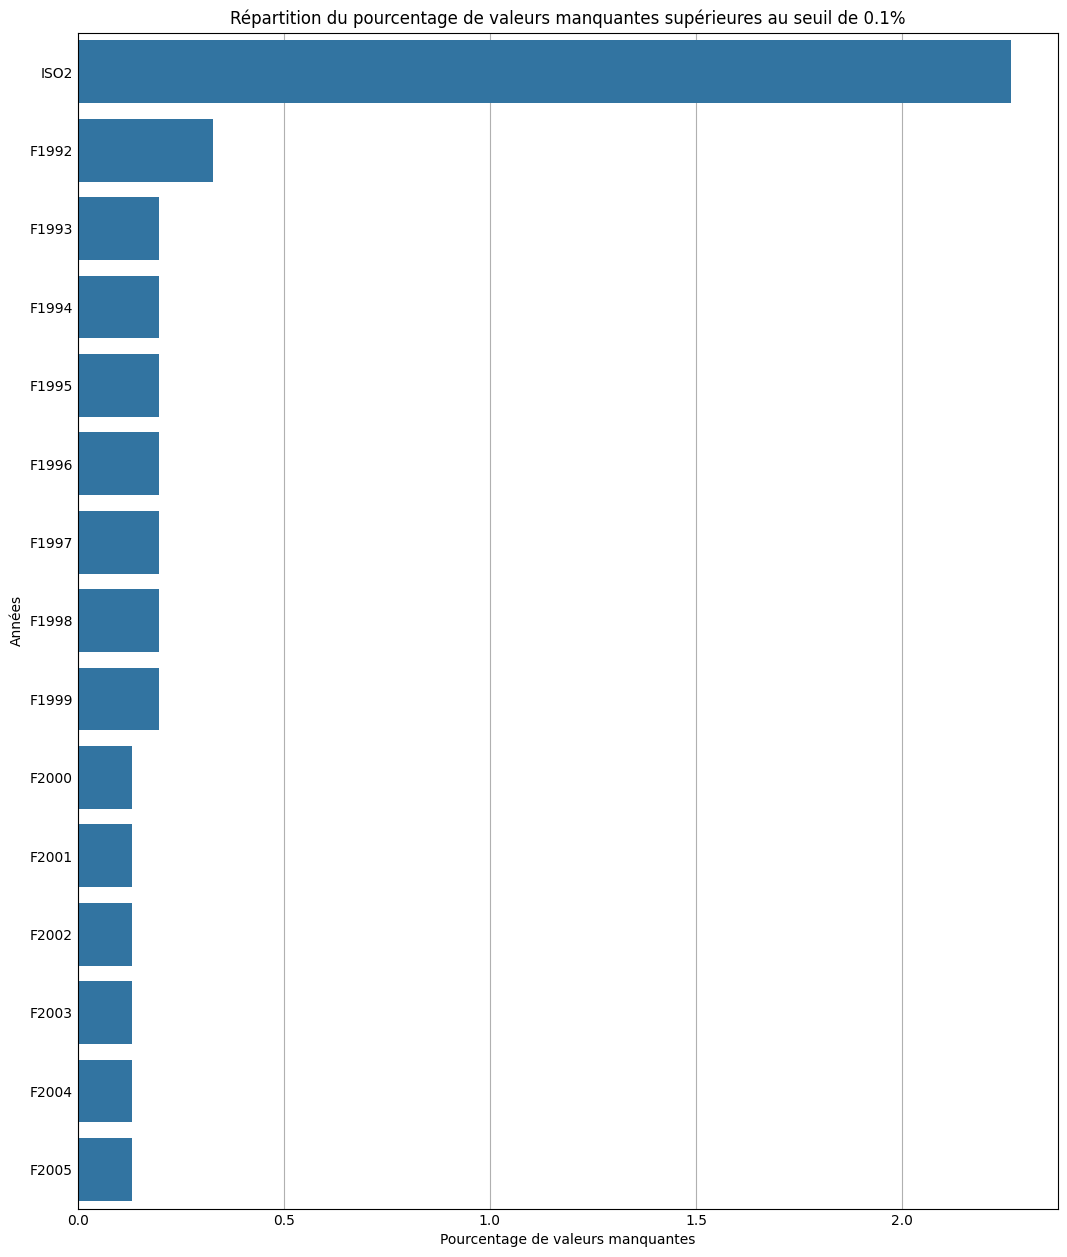

In [22]:
def analyze_csv(csv_file_path):
    # Lecture du fichier CSV et création du DataFrame
    df = pd.read_csv(csv_file_path)
    df = pd.DataFrame(df)

    # Aperçu du DataFrame
    print("Aperçu du DataFrame:")
    print(df.head())  # Affiche les premières lignes du DataFrame
    print("\nColonnes du DataFrame:")
    print(df.columns)  # Affiche les noms des colonnes
    print("\nInformations sur le DataFrame:")
    print(df.info())  # Affiche des informations sur le DataFrame
    print("\nDescription du DataFrame:")
    print(df.describe().round(2))  # Affiche les statistiques descriptives du DataFrame

    # Vérification des valeurs uniques dans chaque colonne
    def checking_unique_value(df):
        unique_values = [df[col].nunique() for col in df]
        for col, values in zip(df.columns, unique_values):
            print(f"Valeurs uniques dans la colonne '{col}': {values}")

    print("\nValeurs uniques dans chaque colonne:")
    checking_unique_value(df)

    # Sélection des colonnes numériques
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    print(numeric_columns)

    # Vérification des valeurs manquantes
    print("\nNombre de valeurs manquantes par colonne:")
    print(df.isnull().sum())

    # Pourcentage de valeurs manquantes par colonne
    percent_missing = df.isnull().sum() * 100 / len(df)
    print("\nPourcentage de valeurs manquantes par colonne:")
    print(percent_missing.round(2))
    
    threshold_view = 0.1

    filtered = percent_missing[percent_missing.values > threshold_view]
    plt.figure(figsize=(10, 12)) 
    ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
    ax.set_title(f"Répartition du pourcentage de valeurs manquantes "
                 f"supérieures au seuil de {threshold_view}%");
    ax.set_xlabel("Pourcentage de valeurs manquantes")
    ax.set_ylabel("Années")
    
    plt.show()

# Exemple d'utilisation de la fonction
analyze_csv('./DataSets/Land_Cover_Accounts.csv')

# 2°) Phase de reflexion pour trouver une problématique

Après avoir explorer certains datasets liés à nos sujets respectifs sans vraiment comprendre ce qu'il fallait en faire, ni comment relier chaque datasets les uns avec les autres, nous avons essayé de trouver une problématique permettant de tout relier :

## Quel est l'impact du changement climatique sur l'économie et sur l'immigration ?

# 3°) Nouvelle phase d'exploration plus ciblée

Cf. les Jupyter Notebook du dossier 2ème phase d'exploration

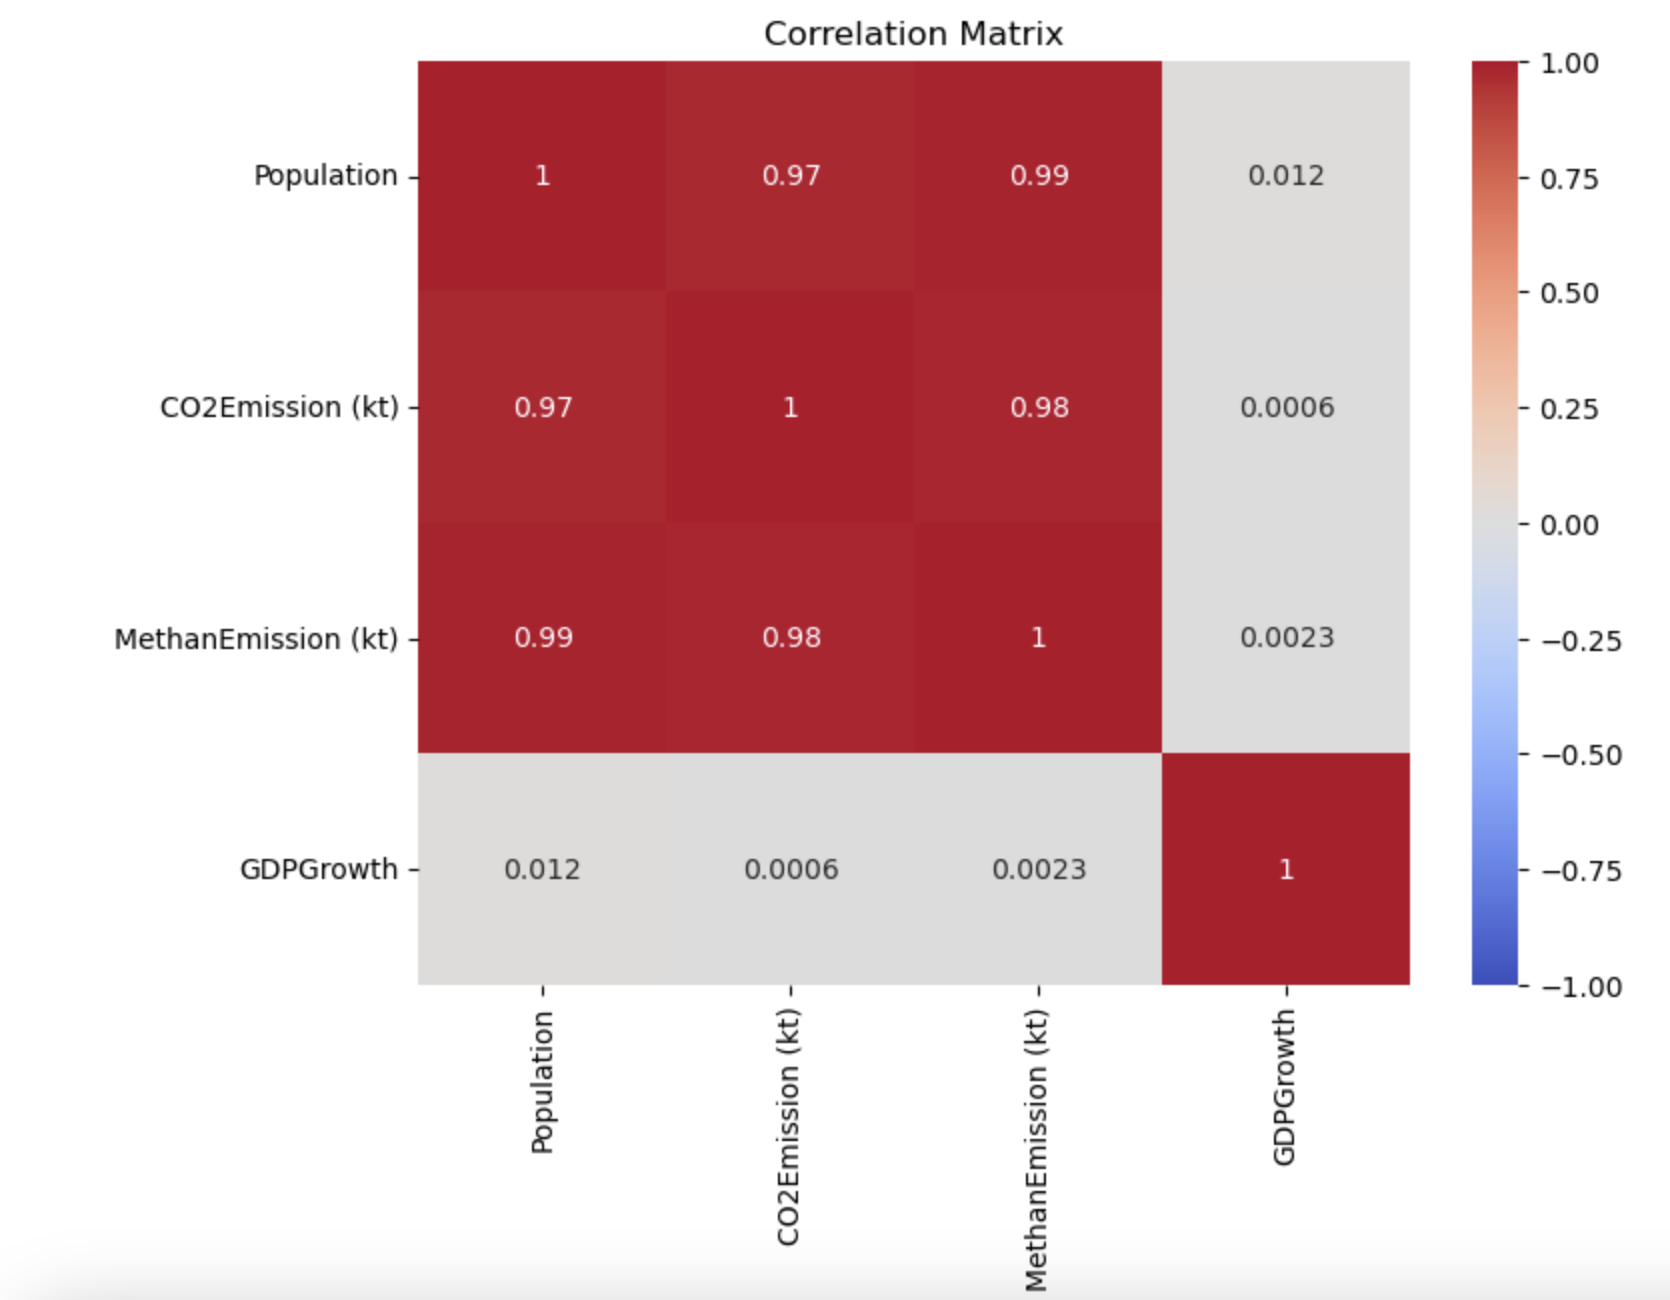

En s'appuyant sur cette matrice de corrélation (ci-dessus) nous avons écarté les datasets liés à l'économie. Nous avons concentrez nos recherches, nos premières projections (Machine Learning) sur les thématiques du changement climatique et de l'immigration (Démographie).

# 4°) Mise en forme du dossier pour le rendu final

- Un dossier `DataSets` dans lequel se trouvent tous les datasets au format CSV utilisés pendant les phases exploratoires
- Un dossier `2èmePhaseExploratoire` dans lequel se trouve tous les jupyter notebook et leurs résulats (fichier CSV clean + ML)
- Le document ci-présent `Summary`pour résumer les différentes phases réalisées au cours de ce cours.